# Result plots for paper

In [49]:
%%time

OUTPUT_DIR = 'results'

import glob, json, os
fnames = glob.glob('results/*/instance_scores.json')
instance_scores = {fname.split('/')[1]:json.load(open(fname)) for fname in fnames}

def make_instance_plot(show_curves, fname, title, ylim=[0.9, 1.0]):

    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure()
    ax = fig.subplots(1)

    f_scores = np.linspace(0, 1, num=20)
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = ax.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)

    table = []
    for rdir, method, name in show_curves:
        s = instance_scores[rdir][method]
        s.update({'name':name})
        table.append(dict(s))
        r_curve, p_curve = s['r_curve'], s['p_curve']
        ax.step(r_curve[1:-1], p_curve[1:-1], where='post', label=name)
    ax.legend()
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_ylim(ylim)
    ax.set_xlim([0.0, 1.0])
    ax.set_title(title)
    # ax.legend(loc='upper left', bbox_to_anchor=(0.0, -0.2))
    # fig.savefig(os.path.join(our_path,'instance_pr.png'), format='png')
    fig.savefig(os.path.join(OUTPUT_DIR,'%s.pdf' % fname), format='pdf')
    import pandas as pd
    df = pd.DataFrame(table)[['name', 'p','r','f','ap']]
    df.columns = ['System','Precision','Recall','$F_1$','AP']
    df.to_latex(os.path.join(OUTPUT_DIR,'%s.tex' % fname), 
                float_format='%.2f', index=False, escape=False, column_format='l|rrr|r')
    return df, fig

for k,v in instance_scores.items():
    print(k, '\n\t', set(v))

24mar-webaroo-t2kcandidates-dbpedia2014 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
22mar-t2dv2-dbpedia2014 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
12mar-t2dv1-t2kcandidates-dbpedia2014 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
24mar-webaroo-dbpedia2014 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
22mar-t2dv2-t2kcandidates-dbpedia2014 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
14mar-t2dv1-dbpedia2014-tokenjacc_cutoff 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
24mar-t2dv2-dbpedia2014_intl 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
22mar-t2dv2-dbpedia_t2ksubset 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
18mar-t2dv1-dbpedia2014-tokenjacc_cutoff 
	 {'t2k-final', 'labelscore_bp0', 'sti', 'combined_bp0', 'coherence_bp0'}
14mar-t2dv1-dbpedi

/export/scratch1/home/kruit/venv/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


,System,Precision,Recall,$F_1$,AP
0,T2KMatch (standard),0.930133,0.723627,0.813987,0.802399
1,TableMiner+ (standard),0.941965,0.670229,0.783196,0.756962
2,Ours (T2K candidates),0.808435,0.736497,0.770791,0.922813
3,Ours (KB subset candidates),0.788619,0.779284,0.783924,0.928602
4,Ours (Full KB candidates),0.869446,0.861220,0.865313,0.949497


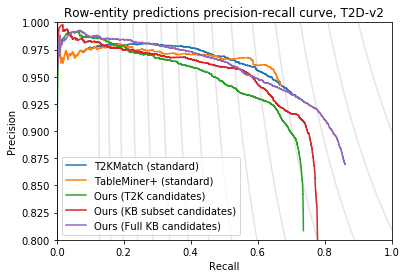

In [45]:

show_curves = [
    # (run, method, title)
    ('22mar-t2dv2-dbpedia2014', 't2k-final', 'T2KMatch (standard)'),
    ('22mar-t2dv2-dbpedia2014', 'sti', 'TableMiner+ (standard)'),
#     ('30oct-v1-goldcandidatesadded-f1-bp1', 't2k-final', 'T2KMatch (with gold)'),

    ('22mar-t2dv2-t2kcandidates-dbpedia2014', 'combined_bp0', 'Ours (T2K candidates)'),
    ('22mar-t2dv2-dbpedia_t2ksubset',         'combined_bp0', 'Ours (KB subset candidates)'),
    ('22mar-t2dv2-dbpedia2014',               'combined_bp0', 'Ours (Full KB candidates)'),
#     ('24mar-t2dv2-dbpedia2014_intl',          'combined_bp0', 'Ours (Intl KB candidates)'),
    
#     ('30oct-v1-goldcandidatesadded-f1-bp1', 'combined_ft0_bp0', 'Ours (with gold)'),
#     ('31oct-v1-goldcandidatesadded-wikidata-labels', 'combined_ft0_bp0', 'Ours (with gold, wikidata)'),
#     ('31oct-v1-goldcandidatesadded-dbpediapart-f1-bp1', 'combined_ft0_bp0', 'Ours (with gold, full dbpedia)'),
]
fname = 'instance_pr_t2dv2'
title = 'Row-entity predictions precision-recall curve, T2D-v2'

df, fig = make_instance_plot(show_curves, fname, title, ylim=[0.8, 1.0])
fig.show()
df

/export/scratch1/home/kruit/venv/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


,System,Precision,Recall,$F_1$,AP
0,T2KMatch (standard),0.867192,0.541081,0.666378,0.766424
1,Ours (T2K candidates),0.736536,0.578652,0.648117,0.872515
2,Ours (own candidates),0.867951,0.830672,0.848903,0.915905


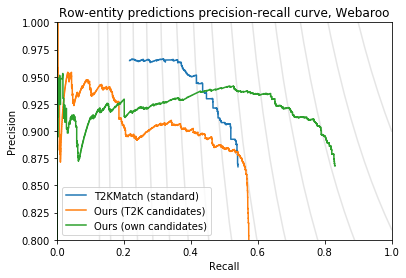

In [51]:
show_curves = [
    ('24mar-webaroo-t2kcandidates-dbpedia2014', 't2k-final', 'T2KMatch (standard)'),
#     ('5nov-webarooListsAsWikiTables', 'sti', 'TableMiner+ (standard)'),
#     ('5nov-webarooListsAsWikiTables-goldCandidates', 't2k-final', 'T2KMatch (with gold)'),
    ('24mar-webaroo-t2kcandidates-dbpedia2014', 'combined_bp0', 'Ours (T2K candidates)'),
    ('24mar-webaroo-dbpedia2014', 'combined_bp0', 'Ours (own candidates)'),
]
fname = 'instance_pr_webaroo'
title = 'Row-entity predictions precision-recall curve, Webaroo'

df, fig = make_instance_plot(show_curves, fname, title, ylim=[0.8,1])
fig.show()
df

# Triples

In [11]:
import pandas as pd
import glob, json, os
fnames = glob.glob('results/*/triple_scores.json')
triple_scores = {fname.split('/')[1]: json.load(open(fname)) for fname in fnames }

def make_triple_plot(show_curves, fname, title):
    
    import matplotlib.pyplot as plt
    import numpy as np
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
    
    for ax in [ax1, ax2]:
        f_scores = np.linspace(0, 1, num=20)
        for f_score in f_scores:
            x = np.linspace(0.01, 1)
            y = f_score * x / (2 * x - f_score)
            l, = ax.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)

    table = []
    renew = []
    for rdir, method, name in show_curves:
        for redundant, ax in [(True, ax1), (False, ax2)]:
            s = dict(triple_scores[rdir]['%s %s'%(method, redundant)])
            s.update({'name':name})
            table.append(s)
            r_curve, p_curve = s['r_curve'], s['p_curve']
            ax.step(r_curve[1:-1], p_curve[1:-1], where='post', label=(name if redundant else''))
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision')
            ax.set_ylim([0.5, 1.0])
            ax.set_xlim([0.0, 1.0])
            ax.set_title(['Novel', 'Redundant'][int(redundant)])
        
        import pandas as pd
        join_triples = pd.read_csv(os.path.join('results',rdir, 'triples', 'extracted_triples.csv'))
        P = (join_triples[method]>0)
        G = (join_triples['gold']>0)
        K = (join_triples['Object Value matches KB'] == True)

        Rpos = sum(P & G & K) / sum(P & G)
        Rneg = sum((~P) & G & K) / sum(G & (~P))
        Qnov = sum(P & G & (~K)) / sum(G & (~K))
        Qred = sum(P & G & K) / sum(G & K)
        renew.append(dict(name=name, Rpos=Rpos, Rneg=Rneg, Qnov=Qnov, Qred=Qred))
        
        
#     fig.suptitle(title)
    fig.legend(bbox_to_anchor=(1., 0.5), loc='center left', borderaxespad=1.)
    plt.tight_layout()
    # ax.legend(loc='upper left', bbox_to_anchor=(0.0, -0.2))
    fig.savefig(os.path.join('paper','%s.pdf' % fname), format='pdf', bbox_inches='tight')
    fig.savefig(os.path.join('paper','%s.png' % fname), format='png', bbox_inches='tight')
    
    
    
    import pandas as pd
    df = pd.DataFrame(table)[['name','redundant', 'precision','recall','f1','ap']]
    df['redundant'] = df['redundant'].map(lambda redundant: ['Novel', 'Redundant'][int(redundant)])
    df.columns = ['System','Redundant', 'Precision','Recall','$F_1$','AP']
    df = df.pivot(index='System', columns='Redundant')
    df.columns = df.columns.swaplevel(0, 1)
    df.sortlevel(0, axis=1, inplace=True, sort_remaining=False)
    df = df.loc[list(tuple(zip(*show_curves))[2])]
    df = df.reset_index()
    
    renew = pd.DataFrame(renew)
    renew['Redundant'] = ''
    renew = renew[['name', 'Redundant', 'Rpos', 'Rneg']]
    renew.columns = ['System', 'Redundant', '$R^+$','$R^-$']
    renew = renew.pivot(index='System', columns='Redundant')
    renew.columns = renew.columns.swaplevel(0, 1)
    renew.sortlevel(0, axis=1, inplace=True, sort_remaining=False)
    
    df = df.merge(renew, on='System')
    
    df.to_latex(os.path.join('paper','%s.tex' % fname), 
                float_format='%.2f', index=False, escape=False, column_format='l||rrr|r||rrr|r||rr')
    return df, fig, renew

print({k:set(v) for k,v in triple_scores.items()})

{'19oct-v2-f1-bp1': {'coherence_ft0_bp0 True', 'labelscore_ft0_bp0 False', 'sti False', 't2k-final True', 'combined_ft0_bp0 True', 'coherence_ft0_bp0 False', 'sti True', 't2k-final False', 'labelscore_ft0_bp0 True', 'combined_ft0_bp0 False'}, '30oct-v1-goldcandidatesadded-f1-bp1': {'coherence_ft0_bp0 True', 'labelscore_ft0_bp0 False', 'sti False', 't2k-final True', 'combined_ft0_bp0 True', 'coherence_ft0_bp0 False', 'sti True', 't2k-final False', 'labelscore_ft0_bp0 True', 'combined_ft0_bp0 False'}, '31oct-v2-goldcandidatesadded-labels': {'coherence_ft0_bp0 True', 'labelscore_ft0_bp0 False', 'sti False', 't2k-final True', 'combined_ft0_bp0 True', 'coherence_ft0_bp0 False', 'sti True', 't2k-final False', 'labelscore_ft0_bp0 True', 'combined_ft0_bp0 False'}, '31oct-v2-goldcandidatesadded-dbpediapart-labels': {'coherence_ft0_bp0 True', 'labelscore_ft0_bp0 False', 'sti False', 't2k-final True', 'combined_ft0_bp0 True', 'coherence_ft0_bp0 False', 'sti True', 't2k-final False', 'labelscore_f

/export/scratch1/home/kruit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:62: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
/export/scratch1/home/kruit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:72: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)


Redundant                System     Novel                                \
                                Precision    Recall     $F_1$        AP   
0                      T2KMatch  0.667810  0.651141  0.659370  0.587597   
1                   TableMiner+  0.650469  0.514968  0.574841  0.531740   
2                          Ours  0.571558  0.677089  0.619864  0.671969   
3          T2KMatch (with gold)  0.621234  0.678653  0.648675  0.567318   
4              Ours (with gold)  0.605959  0.846133  0.706184  0.730232   

Redundant Redundant                                                    
          Precision    Recall     $F_1$        AP     $R^+$     $R^-$  
0          0.880116  0.818825  0.848365  0.897183  0.403613  0.236388  
1          0.890626  0.701345  0.784733  0.854004  0.415558  0.285881  
2          0.868818  0.847912  0.858238  0.908161  0.397595  0.230050  
3          0.881717  0.819172  0.849294  0.901752  0.388602  0.240840  
4          0.868405  0.975690  0.918927  0.926200  0.379425  0.085824

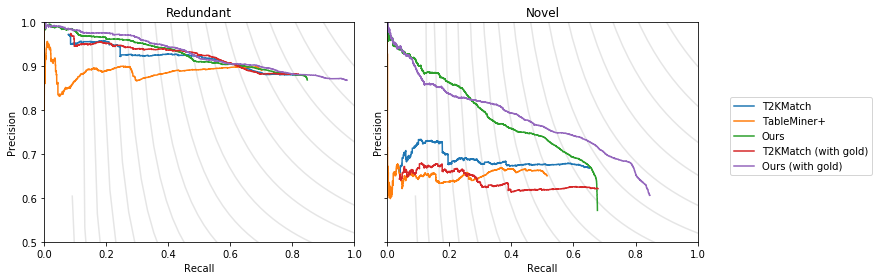

In [12]:
show_curves = [
    ('1nov-v1-check', 't2k-final', 'T2KMatch'),
    ('1nov-v1-check', 'sti', 'TableMiner+'),
    ('1nov-v1-check', 'combined_ft0_bp0', 'Ours'),
    ('30oct-v1-goldcandidatesadded-f1-bp1', 't2k-final', 'T2KMatch (with gold)'),
    ('30oct-v1-goldcandidatesadded-f1-bp1', 'combined_ft0_bp0', 'Ours (with gold)')
]
fname = 'triple_pr_t2dv1'
title = 'Triple predictions precision-recall curve, T2D-v1'
df, fig, renew = make_triple_plot(show_curves, fname, title)
df

/export/scratch1/home/kruit/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/export/scratch1/home/kruit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:62: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
/export/scratch1/home/kruit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:72: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)


Redundant                System     Novel                                \
                                Precision    Recall     $F_1$        AP   
0                      T2KMatch  0.655111  0.666943  0.660974  0.584358   
1                   TableMiner+  0.667559  0.561576  0.609998  0.548124   
2                          Ours  0.561409  0.683978  0.616662  0.673002   
3          T2KMatch (with gold)  0.657231  0.664617  0.660904  0.601851   
4              Ours (with gold)  0.633404  0.807542  0.709951  0.735068   

Redundant Redundant                                                    
          Precision    Recall     $F_1$        AP     $R^+$     $R^-$  
0          0.844403  0.834200  0.839271  0.881366  0.549384  0.411452  
1          0.868840  0.739497  0.798968  0.859964  0.565330  0.386857  
2          0.870405  0.858297  0.864308  0.915004  0.546772  0.318500  
3          0.843799  0.824771  0.834176  0.879502  0.554181  0.454993  
4          0.870537  0.970071  0.917613  0.930605  0.549382  0.170297

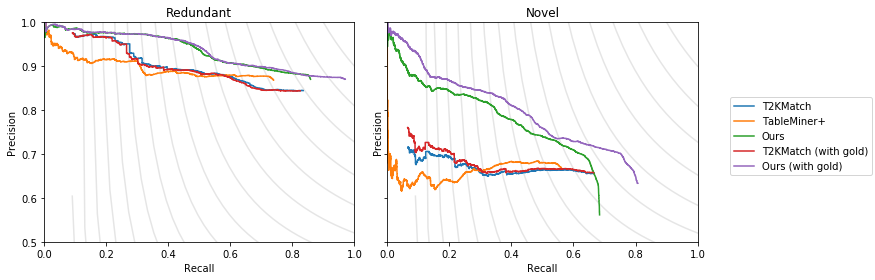

In [13]:
show_curves = [
    ('19oct-v2-f1-bp1', 't2k-final', 'T2KMatch'),
    ('19oct-v2-f1-bp1', 'sti', 'TableMiner+'),
    ('19oct-v2-f1-bp1', 'combined_ft0_bp0', 'Ours'),
    ('31oct-v2-goldcandidatesadded-labels', 't2k-final', 'T2KMatch (with gold)'),
    ('31oct-v2-goldcandidatesadded-labels', 'combined_ft0_bp0', 'Ours (with gold)')
]
fname = 'triple_pr_t2dv2'
title = 'Triple predictions precision-recall curve, T2D-v2'
df, fig, renew = make_triple_plot(show_curves, fname, title)
df